## Lectura y preparación de datos

In [1]:
from pandas import read_csv
df=read_csv('AED_horas_estudio.csv', sep=';')
print(df)

    horas  aprueba
0    0.50        0
1    0.75        0
2    1.00        0
3    1.25        0
4    1.50        0
5    1.75        0
6    1.75        1
7    2.00        0
8    2.25        1
9    2.50        0
10   2.75        1
11   3.00        0
12   3.25        1
13   3.50        0
14   4.00        1
15   4.25        1
16   4.50        1
17   4.75        1
18   5.00        1
19   5.50        1


Adecuación de la matriz de datos de entrada

In [2]:
from numpy import array
X = array(df['horas']).reshape(-1,1) # Variable predictora (VI)
y = array(df['aprueba']) # Variable respuesta (VD)
horas=array(X)
aprueba=array(y)

Gráfico de distribuciones por niveles de la variable respuesta

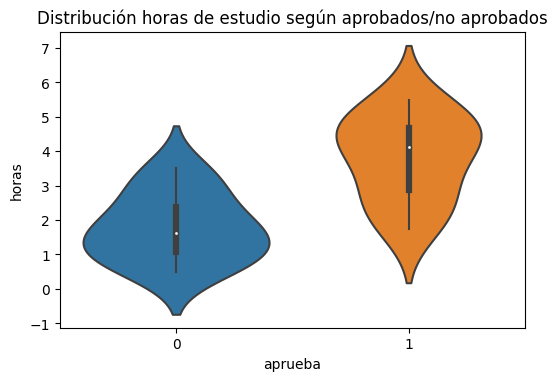

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(6, 3.84))

sns.violinplot(
        x     = 'aprueba',
        y     = 'horas',
        data  = df,
        #color = "white",
        ax    = ax
    )

ax.set_title('Distribución horas de estudio según aprobados/no aprobados');

Comparación de distribuciones a través de un T-Test para dos muestras independientes

In [5]:
from statsmodels.stats.weightstats import ttest_ind

res_ttest = ttest_ind(
                x1 = horas[aprueba == 0],
                x2 = horas[aprueba == 1],
                alternative='two-sided'
            )
print(f"t={res_ttest[0]}, p-value={res_ttest[1]}")

t=[-4.03601032], p-value=[0.00077511]


**Modelo de Regresión Logística con Scikit-learn (sin penalización)**

Es importante poner random_state=0 para generar una misma secuencia de enteros y evitar problemas con el generador pseudo-aleatorio de números
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [25]:
# Estimación del modelo sin penalización
from sklearn.linear_model import LogisticRegression
modelo = LogisticRegression(fit_intercept = True, random_state=0, penalty='none').fit(X,y)
modelo

LogisticRegression(penalty='none', random_state=0)

**Modelo de Regresión Logística con Scikit-learn (con penalización l2)**

In [26]:
modelo_l2 = LogisticRegression(fit_intercept = True, random_state=0, penalty='l2').fit(X,y)
modelo_l2

LogisticRegression(random_state=0)

Sobre penalización en regresión logística:
http://www.sthda.com/english/articles/36-classification-methods-essentials/149-penalized-logistic-regression-essentials-in-r-ridge-lasso-and-elastic-net/#:~:text=Penalized%20logistic%20regression%20imposes%20a,is%20also%20known%20as%20regularization.&text=ridge%20regression%3A%20variables%20with%20minor,their%20coefficients%20close%20to%20zero.

**Evaluación modelos** 



In [27]:
from numpy import exp
print("Intercept:", modelo.intercept_)
print("Coeficiente:", modelo.coef_)
print("Exactitud (accuracy) del modelo:", modelo.score(X, y))
print("OR:", exp(modelo.coef_))

Intercept: [-4.07771764]
Coeficiente: [[1.50464522]]
Exactitud (accuracy) del modelo: 0.8
OR: [[4.50255592]]


In [9]:
from numpy import exp
print("Intercept:", modelo_l2.intercept_)
print("Coeficiente:", modelo_l2.coef_)
print("Exactitud (accuracy) del modelo:", modelo_l2.score(X, y))
print("OR:", exp(modelo_l2.coef_))

Intercept: [-3.13952411]
Coeficiente: [[1.14860386]]
Exactitud (accuracy) del modelo: 0.8
OR: [[3.15378672]]


**Gráfico de la función logit del modelo**

<AxesSubplot: >

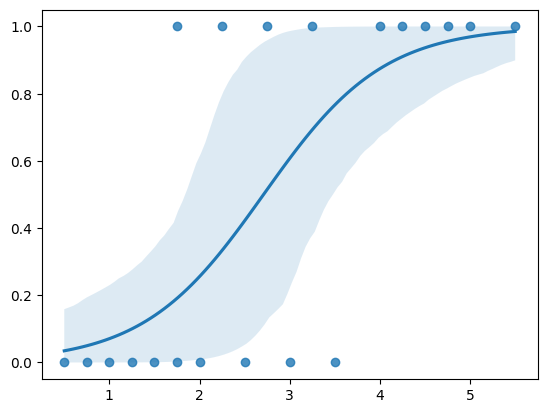

In [10]:
# Mediante la función regplot() de la librería seaborn
sns.regplot(x=X, y=y, data=df, logistic=True)

**Predicción de probabilidades** predict_proba(X)

In [11]:
modelo.predict_proba(X)[:,1]

array([0.03471019, 0.04977274, 0.07089167, 0.10002821, 0.13934393,
       0.1908358 , 0.1908358 , 0.2557023 , 0.3335292 , 0.42162538,
       0.51500967, 0.60735749, 0.69261629, 0.76647995, 0.87444695,
       0.91027722, 0.93662336, 0.95561049, 0.96909691, 0.98519436])

Estimación de las probabilidades de **nuevas predicciones** predict(X)

In [12]:
from numpy import array
X_nuevo = array([0.5, 2, 10]).reshape(-1,1)
prediccion = modelo.predict(X_nuevo)
probabilidad = modelo.predict_proba(X_nuevo)[:,1]
print(prediccion)
print(probabilidad)

[0 0 1]
[0.03471019 0.2557023  0.99998277]


**Curva ROC**

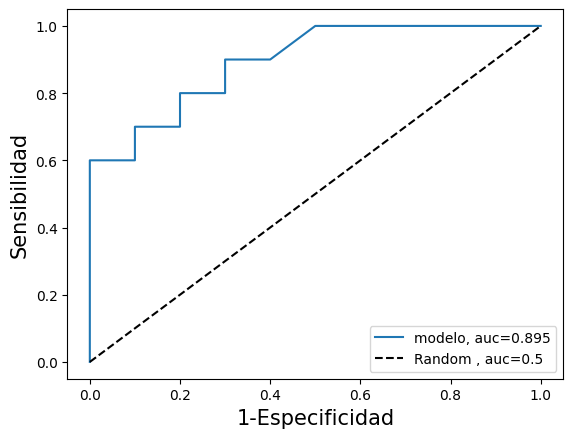

In [13]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_pred_proba = modelo.predict_proba(X)[:,1]
fpr, tpr, _ = roc_curve(y,  y_pred_proba)
auc = roc_auc_score(y, y_pred_proba)
plt.xlabel('1-Especificidad', fontsize=15)
plt.ylabel('Sensibilidad', fontsize=15)
plt.plot(fpr,tpr,label="modelo, auc="+str(auc))
plt.plot([0, 1], [0, 1], 'k--', label = 'Random , auc=0.5')
plt.legend(loc=4)
plt.show()

**Matriz de Confusión**

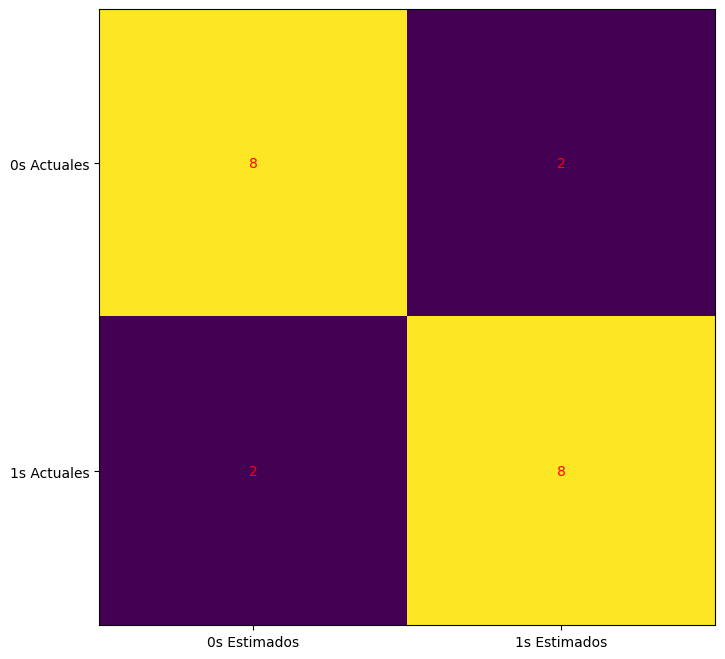

In [14]:
from sklearn.metrics import confusion_matrix
from matplotlib.pyplot import subplots, show
y_pred = modelo.predict(X)
cm = confusion_matrix(y, y_pred)
fig, ax = subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('0s Estimados', '1s Estimados'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('0s Actuales', '1s Actuales'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
show()

Informe de clasificación del modelo de regresión logística estimado

In [15]:
from sklearn.metrics import classification_report
print(classification_report(y, modelo.predict(X)))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80        10
           1       0.80      0.80      0.80        10

    accuracy                           0.80        20
   macro avg       0.80      0.80      0.80        20
weighted avg       0.80      0.80      0.80        20



**Modelo de Regresión Logística con Statsmodels**

https://www.statsmodels.org/stable/index.html

In [16]:
import statsmodels.api as sm
# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo
X_train = sm.add_constant(X, prepend=True)
modelo2 = sm.Logit(y, X_train).fit()
print(modelo2.summary())

Optimization terminated successfully.
         Current function value: 0.401494
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                   20
Model:                          Logit   Df Residuals:                       18
Method:                           MLE   Df Model:                            1
Date:                Fri, 16 Dec 2022   Pseudo R-squ.:                  0.4208
Time:                        19:43:34   Log-Likelihood:                -8.0299
converged:                       True   LL-Null:                       -13.863
Covariance Type:            nonrobust   LLR p-value:                 0.0006365
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.0777      1.761     -2.316      0.021      -7.529      -0.626
x1             1.5046      0.

In [17]:
ypred = modelo2.predict(X_train)
print(ypred)

[0.03471034 0.04977295 0.07089196 0.10002862 0.13934447 0.1908365
 0.1908365  0.25570318 0.33353024 0.42162653 0.51501086 0.60735865
 0.69261733 0.76648084 0.8744475  0.91027764 0.93662366 0.95561071
 0.96909707 0.98519444]


In [18]:
modelo2.pred_table()

array([[8., 2.],
       [2., 8.]])

Cálculo de la Relación de **Odds**

In [19]:
import numpy as np
import pandas as pd

model_odds = pd.DataFrame(np.exp(modelo2.params), columns= ['OR'])
model_odds['p-value']= modelo2.pvalues
model_odds[['2.5%', '97.5%']] = np.exp(modelo2.conf_int())

model_odds

,OR,p-value,2.5%,97.5%
0,0.016946,0.020582,0.000537,0.534605
1,4.502557,0.016703,1.313080,15.439291


Evaluación y validación del modelo a partir de la **división de los datos en entrenamiento y prueba (80/20)**

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
x1_train, x1_test, y1_train, y1_test = train_test_split(X, y, random_state=0, test_size=0.2)
logreg = LogisticRegression(penalty='none', random_state=0).fit(x1_train,y1_train)
logreg
print("Precisión del conjunto de entrenamiento: {:.3f}".format(logreg.score(x1_train,y1_train)))
print("Precisión del conjunto de prueba: {:.3f}".format(logreg.score(x1_test,y1_test)))

Precisión del conjunto de entrenamiento: 0.750
Precisión del conjunto de prueba: 0.750


Evaluación y validación del modelo mediante **Validación Cruzada (k=10)**

In [29]:
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty='none', random_state=0)
scores = cross_val_score(model, X, y, scoring='accuracy', cv=10)
print('Precisión del modelo con CV: %.3f' % (mean(scores)))

Precisión del modelo con CV: 0.750


Evaluación y validación del modelo mediante **Leave-One-Out**

In [30]:
# evaluate a logistic regression model using leave-one-out
from sklearn.model_selection import LeaveOneOut
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from numpy import mean, std, absolute, sqrt
cv = LeaveOneOut()
model = LogisticRegression(penalty='none', random_state=0)
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Precisión del modelo con leave-one-out CV: %.3f' % (mean(scores)))

Precisión del modelo con leave-one-out CV: 0.750
